In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import emd
from statistics import mean
from scipy import signal, ndimage
import math

from scipy.optimize import curve_fit
import matplotlib.patches as ptc
from numpy.polynomial import Polynomial
from scipy.io import readsav
import os
import scipy.linalg as la
from scipy.stats import sem
from scipy import asarray as ar,exp
from functions import *


In [2]:
import scienceplots
plt.style.use(['science','notebook','grid'])

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:

name = '../IMP/03_0123720301/pn_b50_03_0123720301_flare2_decay.dat'
datContent = [i.strip().split() for i in open(name).readlines()]
datContent = datContent[5:]

t   = np.array(datContent)[:,0]
x1  = np.array(datContent)[:,1]
e   = np.array(datContent)[:,2]

In [5]:
t_,x_,e_=[],[],[]
for i in range(len(t)):
    t_.append(float(t[i]))
    x_.append(float(x1[i]))    
    e_.append(float(e[i]))    
    
t_ = np.array(t_)
x_ = np.array(x_)
e_ = np.array(e_)

In [6]:
dt= 80/60
fs= 1/dt

In [7]:
x=x_[:]
t1=t_[:]

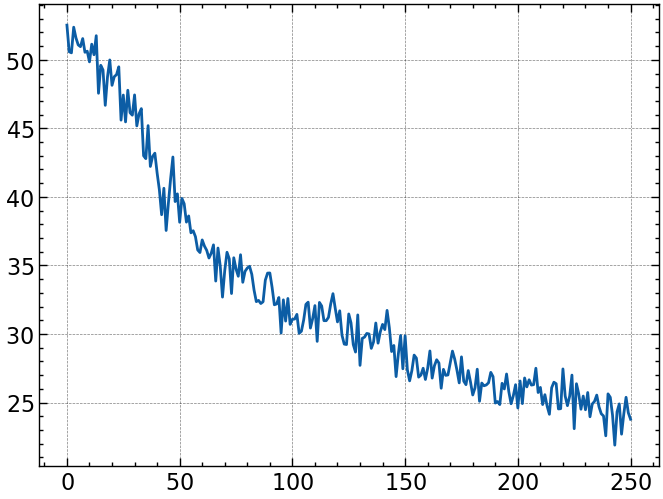

In [8]:
plt.plot(x_)

In [9]:
# s,e= 180,400
# s,e= 0, -1
# t1  =   t_
# x   =   x_

In [10]:
len(t1)

251

In [11]:
# plt.plot(t1,x)

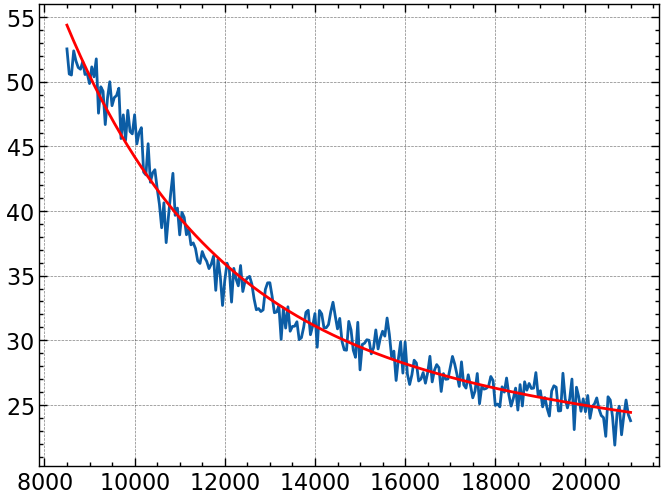

In [12]:
popt, pcov = curve_fit(exp,t1, x,bounds=(0,[1e5,1e5,1e5,1e5,1e2,1e3,1e1] ))
plt.plot(t1,x)
plt.plot(t1, exp(t1, *popt), color='red')
# plt.savefig('results/'+dir_+'/Texp.png')

In [13]:
c1,m1,c2,m2,c3,m3,y0=popt

In [14]:
Texp    =   exp(t1, *popt)
x1      =   x - Texp

Text(0.5, 1.0, 'F0-Texp')

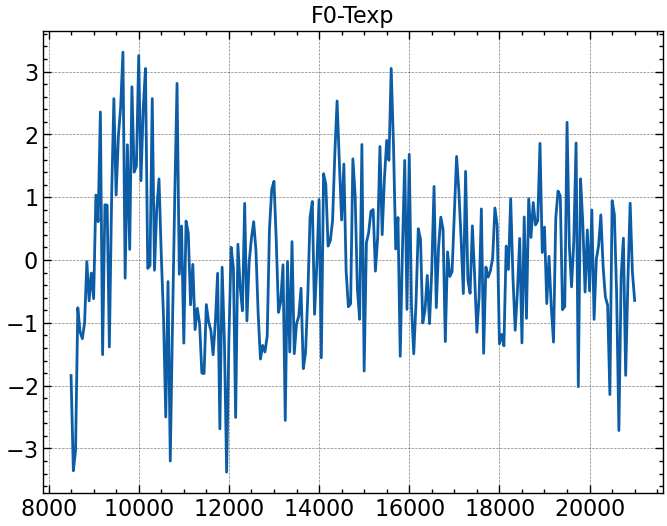

In [15]:
plt.plot(t1,x1)
plt.title('F0-Texp')
# plt.savefig('results/'+dir_+'/F0-Texp.png')

In [16]:
# x1 = 7*np.sin(1*2*np.pi*t1) + 3*np.sin(5*2*np.pi*t1) + np.sin(9*2*np.pi*t1)

In [17]:
imfm = emd.sift.mask_sift(x1)
n_imfm= len(imfm[0,:])

 Inputs samples (251) is small for specified max_imfs (9) very likely that 6 or fewer imfs are returned


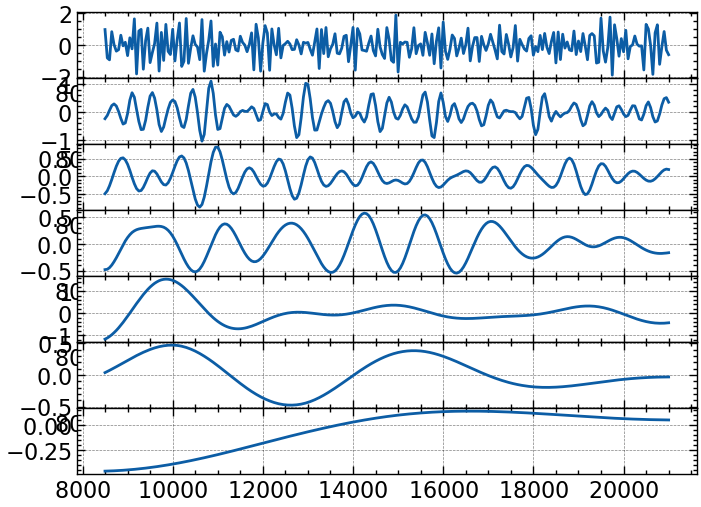

In [18]:
# plt.figure(figsize=(12,12))

for i in range(n_imfm):
    plt.subplot(n_imfm,1,i +1)
    plt.plot(t1,imfm[:,i])
    
    plt.subplots_adjust(wspace=0, hspace=0)
    
# plt.savefig('results/'+dir_+'/imfs.png')

In [19]:
Em=[]
Pm=[]
for i in range(n_imfm-1):
    E=mean(imfm[:,i]**2)
    P=len(imfm[:,i])/bm(imfm[:,i])
    Em.append(E)
    Pm.append(P)
    
Ex=mean(x**2)
Px=2*len(x)/bm(x)

Em=np.array(Em)
Pm=np.array(Pm)


In [20]:
Pm

array([  3.09876543,   6.97222222,  13.94444444,  27.88888889,
        50.2       , 125.5       ])

-0.03597015227581882


(0.01, 0.9756772953821429)

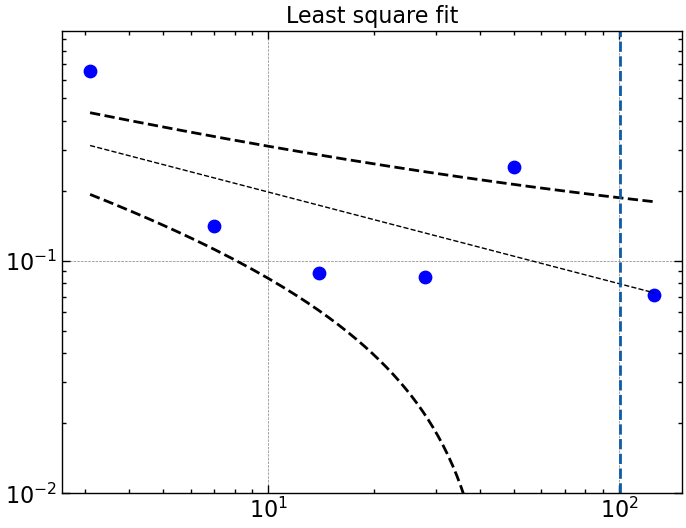

In [21]:
lf, slope, L, U = bypart(x1,Pm,Em,0,n_imfm,3.646)
plt.title('Least square fit')
plt.plot(lf[0],lf[1],'--',color='black',linewidth=1)
plt.plot((lf[0])[:],U[:],c='black',linestyle='--')
plt.plot((lf[0])[:],L[:],c='black',linestyle='--')

plt.scatter((Pm),(Em),color='blue',s=80)
print(slope)

plt.loglog()
plt.axvline(x=.4*len(x1),linestyle='--')
plt.ylim(1e-2)



In [22]:
trend = 5

Text(0.5, 1.0, 'Temd')

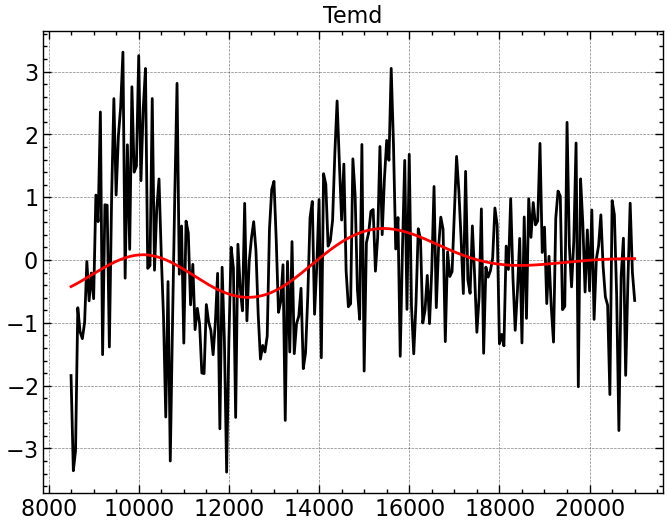

In [23]:
Temd = np.zeros(len(imfm[:,0]))
for i in range(trend,n_imfm):
    Temd = Temd+imfm[:,i]
    
plt.plot(t1,x1,c='black')
plt.plot(t1,Temd,c='red')
plt.title('Temd')
# plt.savefig('results/'+dir_+'/Temd.png')

In [42]:
x2 = x1-Temd

Text(0.5, 1.0, 'F0-Texp-Temd')

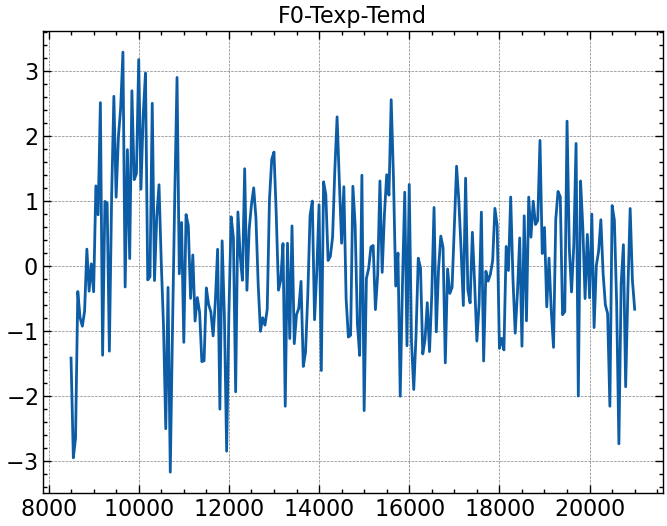

In [43]:
# plt.figure(figsize=(12,4))
plt.plot(t1,x2)
# plt.plot(t1,imfm[:,3],linewidth=3,c='brown')
plt.title('F0-Texp-Temd')
# plt.savefig('results/'+dir_+'/correlated.png')

In [46]:
x2 = x

[5.83028472e-04 2.61804815e+00]


[]

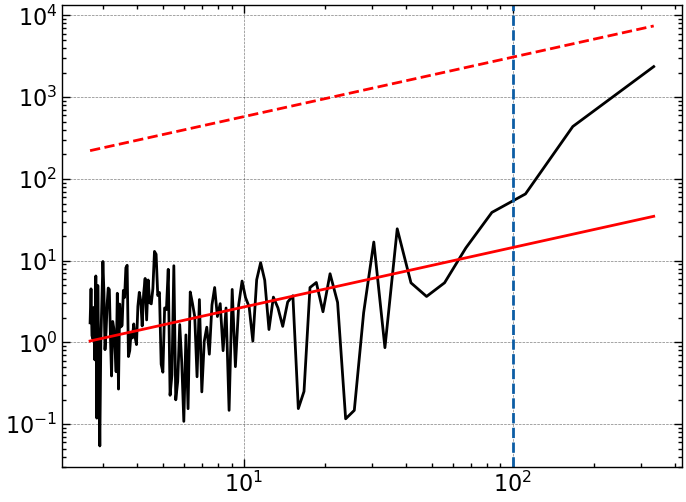

In [47]:
fxx, pxx =sp.signal.welch(x2,fs,detrend='linear',window='boxcar', nperseg=len(x2))
non_zero_indices = fxx != 0
period = 1 / fxx[non_zero_indices]
popt, pcov = curve_fit(scaling,period, pxx[non_zero_indices])
print(popt)

sig=np.std(pxx)
prd=np.linspace(min(period),max(period),1000)

plt.plot(period,pxx[non_zero_indices],c='black')
plt.axvline(x=.4*len(x),linestyle='--')

lf=log_fit(period,pxx[non_zero_indices],prd,1)
plt.plot(lf[0],lf[1],color='red')
plt.plot(lf[0], lf[1]*1*(sig),color='red',linestyle='--')
plt.loglog()
# plt.savefig('results/'+dir_+'/fft.png')

In [45]:
period

array([334.66666667, 167.33333333, 111.55555556,  83.66666667,
        66.93333333,  55.77777778,  47.80952381,  41.83333333,
        37.18518519,  33.46666667,  30.42424242,  27.88888889,
        25.74358974,  23.9047619 ,  22.31111111,  20.91666667,
        19.68627451,  18.59259259,  17.61403509,  16.73333333,
        15.93650794,  15.21212121,  14.55072464,  13.94444444,
        13.38666667,  12.87179487,  12.39506173,  11.95238095,
        11.54022989,  11.15555556,  10.79569892,  10.45833333,
        10.14141414,   9.84313725,   9.56190476,   9.2962963 ,
         9.04504505,   8.80701754,   8.58119658,   8.36666667,
         8.16260163,   7.96825397,   7.78294574,   7.60606061,
         7.43703704,   7.27536232,   7.12056738,   6.97222222,
         6.82993197,   6.69333333,   6.5620915 ,   6.43589744,
         6.31446541,   6.19753086,   6.08484848,   5.97619048,
         5.87134503,   5.77011494,   5.67231638,   5.57777778,
         5.4863388 ,   5.39784946,   5.31216931,   5.22

[]

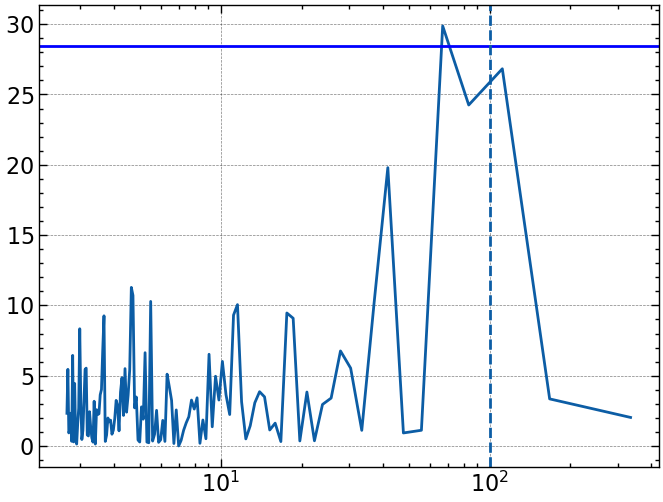

In [28]:
# plt.figure(figsize=(10,6))

fxx, pxx =sp.signal.welch(x2,fs,detrend='linear',window='boxcar', nperseg=len(x2))
plt.plot(1/fxx,pxx)
p0=.05
y0= scargle(p0,fxx,pxx)
plt.axhline(y=y0,color='blue')
plt.axvline(x=.4*len(x),linestyle='--')


plt.semilogx()
# plt.ylim(0,2*y0)
# plt.savefig('results/'+dir_+'/periodogram.png')

In [29]:
1/fxx

array([         inf, 334.66666667, 167.33333333, 111.55555556,
        83.66666667,  66.93333333,  55.77777778,  47.80952381,
        41.83333333,  37.18518519,  33.46666667,  30.42424242,
        27.88888889,  25.74358974,  23.9047619 ,  22.31111111,
        20.91666667,  19.68627451,  18.59259259,  17.61403509,
        16.73333333,  15.93650794,  15.21212121,  14.55072464,
        13.94444444,  13.38666667,  12.87179487,  12.39506173,
        11.95238095,  11.54022989,  11.15555556,  10.79569892,
        10.45833333,  10.14141414,   9.84313725,   9.56190476,
         9.2962963 ,   9.04504505,   8.80701754,   8.58119658,
         8.36666667,   8.16260163,   7.96825397,   7.78294574,
         7.60606061,   7.43703704,   7.27536232,   7.12056738,
         6.97222222,   6.82993197,   6.69333333,   6.5620915 ,
         6.43589744,   6.31446541,   6.19753086,   6.08484848,
         5.97619048,   5.87134503,   5.77011494,   5.67231638,
         5.57777778,   5.4863388 ,   5.39784946,   5.31

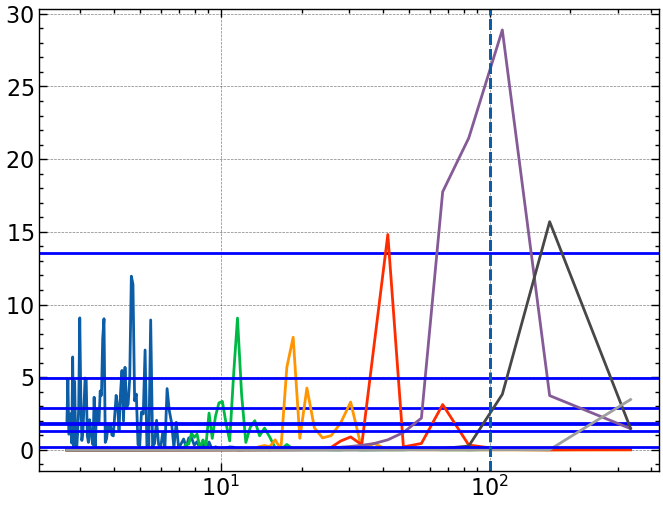

In [32]:
for i in range(n_imfm):
    fxx, pxx =sp.signal.welch(imfm[:,i],fs,detrend='linear',window='boxcar', nperseg=len(x2))
    plt.plot(1/fxx,pxx)
    p0=.05
    y0= scargle(p0,fxx,pxx)

    # plt.axhline(y=y0,color='blue')
    plt.axvline(x=0.4*len(x),linestyle='--')
    


    plt.semilogx()
    

    

In [31]:
1/fxx

array([         inf, 334.66666667, 167.33333333, 111.55555556,
        83.66666667,  66.93333333,  55.77777778,  47.80952381,
        41.83333333,  37.18518519,  33.46666667,  30.42424242,
        27.88888889,  25.74358974,  23.9047619 ,  22.31111111,
        20.91666667,  19.68627451,  18.59259259,  17.61403509,
        16.73333333,  15.93650794,  15.21212121,  14.55072464,
        13.94444444,  13.38666667,  12.87179487,  12.39506173,
        11.95238095,  11.54022989,  11.15555556,  10.79569892,
        10.45833333,  10.14141414,   9.84313725,   9.56190476,
         9.2962963 ,   9.04504505,   8.80701754,   8.58119658,
         8.36666667,   8.16260163,   7.96825397,   7.78294574,
         7.60606061,   7.43703704,   7.27536232,   7.12056738,
         6.97222222,   6.82993197,   6.69333333,   6.5620915 ,
         6.43589744,   6.31446541,   6.19753086,   6.08484848,
         5.97619048,   5.87134503,   5.77011494,   5.67231638,
         5.57777778,   5.4863388 ,   5.39784946,   5.31

### 